In [1]:
import pandas as pd

In [17]:
import matplotlib.pyplot as plt

In [10]:
%matplotlib inline

In [2]:
df = pd.read_excel('sequences_for_cm.xlsx')

In [4]:
grp = df.groupby(df['qseqid'])

In [6]:
pidentr_dict = {}

In [7]:
for name, data in grp:
    pident_r = data['pident'].max() - data['pident'].min()
    pidentr_dict[name] = pident_r

In [8]:
name_list = []
energy_list = []

In [9]:
with open('RNAalifold_results.txt', 'r') as f:
    for count, line in enumerate(f):
        if count == 0 or count % 3 == 0:
            name = line.split('/')[1].split('_seqs_')[0]
            name_list.append(name)
        if count == 2 or count % 3 == 2:
            energy = line.split('=')[0][-7:].strip()
            energy_list.append(energy)

In [11]:
edf = pd.DataFrame({'name': name_list, 'delta_G': energy_list})

In [15]:
edf['pident_range'] = edf['name'].map(pidentr_dict)

In [16]:
edf

,delta_G,name,pident_range
0,-18.60,c0293_EC,0.000
1,-0.32,c0343_EC,25.333
2,-44.93,Esr1_EC,2.991
3,-53.16,Esr2_EC,3.191
4,-29.69,Esr4_EC,21.721
5,-41.24,Esr5_EC,7.692
6,-11.53,Esr6_EC,25.714
7,-38.38,Esr8_EC,17.931
8,-12.80,Esr9_EC,19.444
9,-23.29,eyeA_EC,2.667


In [18]:
edf[['delta_G']] = edf[['delta_G']].apply(pd.to_numeric)

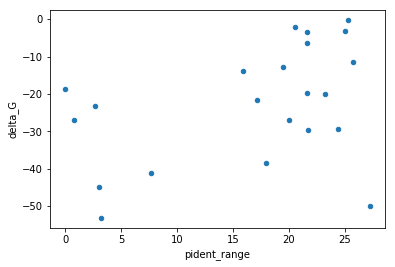

In [19]:
edf.plot(kind = 'scatter', x='pident_range', y='delta_G')

In [20]:
cd pa_results/redo/

/Users/aug/workspace/bio/sRNA/ecoli/pa_results/redo


In [24]:
df = pd.read_excel('rfam_blast.xlsx', sheet=0)

In [25]:
df

,All Rfam results reflected in BLAST results?,# genomes marked present via Rfam but not via BLAST,All BLAST results reflected in Rfam results?,# genomes marked present via BLAST but not via Rfam,Existing or homemade CM?,total # NR rfam hits,total # NR BLAST hits,total unique hits,% reflected using BLAST alone,# more hits with cmsearch than Rfam
ffs_EC,True,0,True,0,RF00169,1100,1100,1100,1.000000,0
ryhB_EC_rf,True,0,True,0,RF00057,1100,1100,1100,1.000000,0
ssrA_EC,True,0,True,0,RF00023,1100,1100,1100,1.000000,0
ssrS_6S_EC_rf,True,0,True,0,RF00013,1100,1100,1100,1.000000,0
spf_EC,True,0,True,0,RF00021,1099,1099,1099,1.000000,0
Esr8_EC,True,0,True,0,0,1086,1086,1086,1.000000,0
Esr9_EC,True,0,True,0,0,929,929,929,1.000000,0
dsrA_EC,True,0,True,0,RF00014,915,915,915,1.000000,0
STnc3000_ST,True,0,True,0,0,912,912,912,1.000000,0
istR_EC_rf,True,0,True,0,RF01400,858,858,858,1.000000,0


In [26]:
edf.set_index('name', inplace=True)

In [28]:
edf.index.name = 'name'

In [36]:
df = df.rename(columns={'# more hits with cmsearch than Rfam': 'cmsearch_advantage'})

In [47]:
df.index.name = 'name'

In [53]:
edf = pd.merge(edf, df[['cmsearch_advantage']], how='left', left_index=True, right_index=True)

In [54]:
edf

,delta_G,pident_range,cmsearch_advantage
name,,,
c0293_EC,-18.60,0.000,0
c0343_EC,-0.32,25.333,-20
Esr1_EC,-44.93,2.991,62
Esr2_EC,-53.16,3.191,11
Esr4_EC,-29.69,21.721,227
Esr5_EC,-41.24,7.692,0
Esr6_EC,-11.53,25.714,132
Esr8_EC,-38.38,17.931,0
Esr9_EC,-12.80,19.444,0


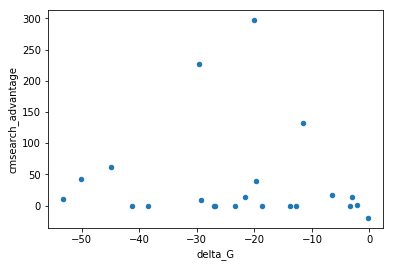

In [55]:
edf.plot(kind = 'scatter', x='delta_G', y='cmsearch_advantage')